In [7]:
# ...This dataset is collected from Addis Ababa Sub city police departments. The dataset has been prepared from 
#    manual records of road traffic accidents of the year 2017-20...

# --- The dataset has been downloaded from kaggle.com ---

Data Shape: (12316, 15)

First 10 rows:


,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
5,31-50,Male,Unknown,Unknown,Unknown,Unknown,Y Shape,Unknown,Daylight,Normal,Vehicle with vehicle collision,U-Turn,Not a Pedestrian,Overloading,2
6,18-30,Male,Junior high school,Employee,2-5yr,Undivided Two way,Crossing,Unknown,Daylight,Normal,Vehicle with vehicle collision,Moving Backward,Not a Pedestrian,Other,2
7,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,U-Turn,Not a Pedestrian,No priority to vehicle,2
8,18-30,Male,Junior high school,Employee,Above 10yr,other,Y Shape,Earth roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Crossing from driver's nearside,Changing lane to the right,2
9,18-30,Male,Junior high school,Employee,1-2yr,Undivided Two way,Y Shape,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,U-Turn,Not a Pedestrian,Moving Backward,1


MAE: 0.28
MSE: 0.17
RMSE: 0.42


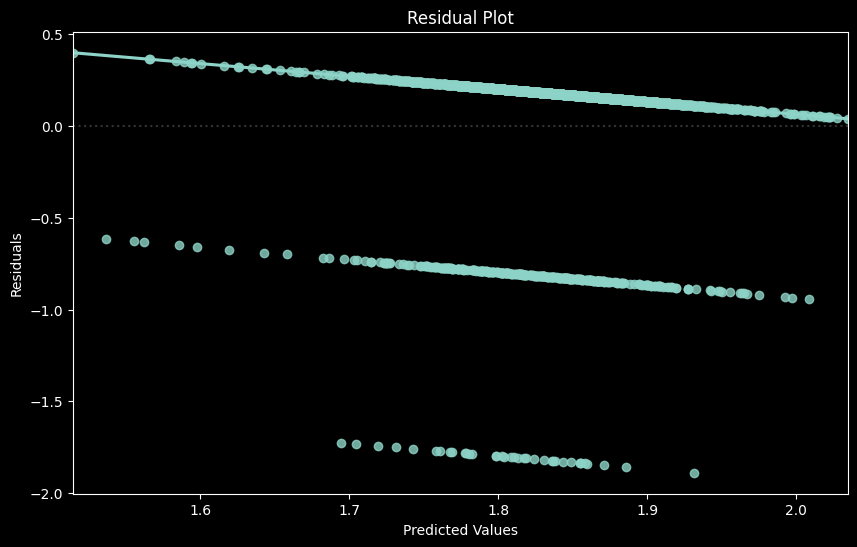

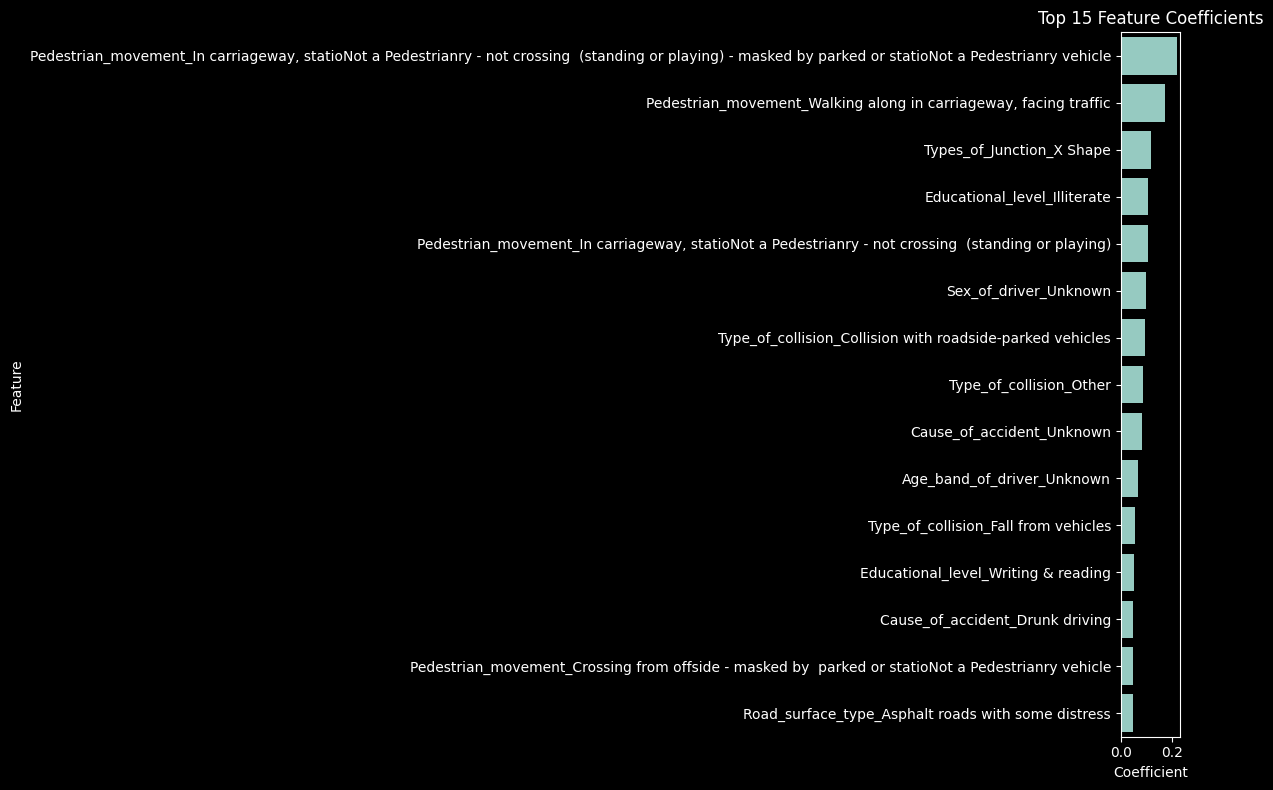

Prediction Example:

Predicted Severity: 1.75
Actual Severity: 2


In [8]:
## Accident Severity Prediction - Linear Regression Analysis

## 1. Data Preparation
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## Load data
df = pd.read_csv('cleaned.csv')

# Display basic info
print("Data Shape:", df.shape)
print("\nFirst 10 rows:")
display(df.head(10))

## Preprocessing
# Handle categorical variables
categorical_cols = ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
                   'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
                   'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
                   'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
                   'Pedestrian_movement', 'Cause_of_accident']

# Create dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features(independent variables) and target(dependent variable)
X = df_encoded.drop('Accident_severity', axis=1)
y = df_encoded['Accident_severity']

## Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Initialize and train model
trainModel = LinearRegression()
trainModel.fit(X_train, y_train)

## 3. Model Pridictions
y_pred = trainModel.predict(X_test)

# Calculations
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}")

## Plotting Analysis
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test-y_pred, lowess=True)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Feature Importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': trainModel.coef_}).sort_values('Coefficient', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(15))
plt.title('Top 15 Feature Coefficients')
plt.tight_layout()
plt.show()

## 4. Prediction Example
sample = X_test.iloc[0:1]
print("Prediction Example:")
print(f"\nPredicted Severity: {trainModel.predict(sample)[0]:.2f}")
print(f"Actual Severity: {y_test.iloc[0]}")